In [1]:
# Homework:
# Write your own leapfrog scheme to calculate the orbit of two equal mass binary.
# The mass of each binary makes GM_{i}=1, (i is 1 or 2). The two binary stars are
# seperated by a distance of 1 initially. Initialize the binary velocity so that
# each binary star will have an eccentricity of 0.5. Evolve this system to 100
# binary orbits, and plot their orbits in the x-y plane. (Hint: both stars will drift
# together first, and then being kicked at the middle step at the same time, 
# and then drift again).

In [184]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

e = 0.5
max_iter = 100
G = 1
M1,M2 = 1,1 
M_Tot = M1+M2 
M = M1*M2/(M_Tot) #reduced mass
e = 0.5 #eccentricity
tend=2.*np.pi*100
h=0.01
t=0
v = np.sqrt(G*M1*(2-np.sqrt(1-e)))
# I wasn't sure how to calculate the velocity, so I used the equation here https://en.wikipedia.org/wiki/Elliptic_orbit
# and 
y1 = [-0.5,0,0,v] #[x_pos,x_vel,y_pos,y_vel]
#should be separated by r = 1
y2 = [0.5,0,0,v]

tend = tend=2.*np.pi*50.

def f(t, y):
    f=np.zeros(4)
    r=np.sqrt(y[0]*y[0]+y[2]*y[2])
    f[0]=y[1] #x velocity
    f[1]=-G*M/r/r/r*y[0] #x force
    f[2]=y[3] #y velocity
    f[3]=-G*M/r/r/r*y[2] #y force
    return f # [x_v,x_F,y_v,y_F]
    
def lf(t, h, y, n):
    # drift step
    fv=f(t, y)
    for i in [0,2]:
        y[i]+=fv[i]*h/2.
    # kick step
    fv=f(t, y)
    for i in [1,3]:
        y[i]+=fv[i]*h
    # drift step
    fv=f(t, y)
    for i in [0,2]:
        y[i]+=fv[i]*h/2.
    return y

x1p=[]
y1p=[]
x2p=[]
y2p=[]
while(t<tend):
    if((t+h)>tend):
        h=tend-t
    y1 = lf(t,h,y1,4)
    x1p=np.append(x1p,y1[0])
    y1p=np.append(y1p,y1[2])
    y2 = lf(t,h,y2,4)
    x2p=np.append(x2p,y2[0])
    y2p=np.append(y2p,y2[2])
    t = t+h

1.137054624375387


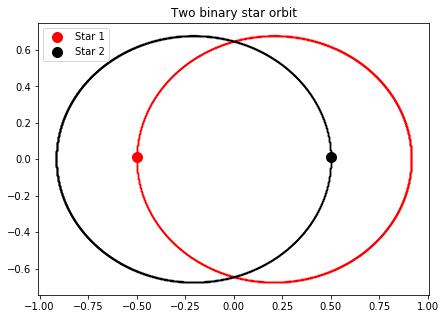

In [185]:
plt.figure(figsize=(7,5))
plt.title('Two binary star orbit')
plt.plot(x1p,y1p,'ro',markersize=0.1)
plt.plot(x2p,y2p,'ko',markersize=0.1)
plt.plot(x1p[0],y1p[0],'ro',markersize=10,label='Star 1')
plt.plot(x2p[0],y2p[0],'ko',markersize=10, label='Star 2')
plt.legend(loc='upper left')
plt.show()